# Week 4 : Python Data Science Toolbox (Part 2)

## Using iterators in PythonLand

### Introduction to Iterators
- Iterate over a range object using `for` loop
- Iterables : list, strings, dictionaries, file connections -> `iter()` method -> creates iterator
- Iterator : an object that keeps state and produces the next value when you call `next()` on it
    - produces next value using `next()` / `*` : iterating at once

In [2]:
# Iterating over iterables (1)
# Using for loop
flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']

for person in flash :
    print(person)

jay garrick
barry allen
wally west
bart allen


In [3]:
# Using iterator
superhero = iter(flash)
print(next(superhero))
print(next(superhero))
print(next(superhero))
print(next(superhero))

jay garrick
barry allen
wally west
bart allen


In [4]:
# Iterating over iterables (2)
# range() function
small_value = iter(range(3))

print(next(small_value))
print(next(small_value))
print(next(small_value))

0
1
2


In [5]:
for i in range(3):
    print(i)

0
1
2


In [6]:
googol = iter(range(10**100))
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))

0
1
2
3
4


In [7]:
# Iterators as function arguments
values = range(10,21)
print(values)

values_list = list(values)
print(values_list)

values_sum = sum(values)
print(values_sum)

range(10, 21)
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
165


### Playing with iterators
- `enumerate()` : pairs of iterable and index
    - `for index, value in enumerate(list, start=n) : `
- `zip()` : zip two lists

In [8]:
# Using enumerate
mutants = ['charles xavier', 
            'bobby drake', 
            'kurt wagner', 
            'max eisenhardt', 
            'kitty pryde']
mutant_list = list(enumerate(mutants))
print(mutant_list)

[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pryde')]


In [9]:
for index1,value1 in enumerate(mutants):
    print(index1, value1)

0 charles xavier
1 bobby drake
2 kurt wagner
3 max eisenhardt
4 kitty pryde


In [10]:
for index2,value2 in enumerate(mutants, start=1):
    print(index2, value2)

1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pryde


In [11]:
# Using zip
aliases = ['prof x', 'iceman', 'nightcrawler', 'magneto', 'shadowcat']
powers = ['telepathy', 'thermokinesis', 'teleportation', 'magnetokinesis', 'intangibility']

mutant_data = list(zip(mutants, aliases, powers))
print(mutant_data)

[('charles xavier', 'prof x', 'telepathy'), ('bobby drake', 'iceman', 'thermokinesis'), ('kurt wagner', 'nightcrawler', 'teleportation'), ('max eisenhardt', 'magneto', 'magnetokinesis'), ('kitty pryde', 'shadowcat', 'intangibility')]


In [12]:
mutant_zip = zip(mutants, aliases, powers)
print(mutant_zip)

In [13]:
for value1, value2, value3 in mutant_zip:
    print(value1, value2, value3)

charles xavier prof x telepathy
bobby drake iceman thermokinesis
kurt wagner nightcrawler teleportation
max eisenhardt magneto magnetokinesis
kitty pryde shadowcat intangibility


In [17]:
# Using * and zip to 'unzip'
z1 = zip(mutants, powers)
print(*z1)

('charles xavier', 'telepathy') ('bobby drake', 'thermokinesis') ('kurt wagner', 'teleportation') ('max eisenhardt', 'magnetokinesis') ('kitty pryde', 'intangibility')


In [21]:
z1 = zip(mutants, powers)

result1, result2 = zip(*z1)

print(result1 == mutants)
print(result2 == powers)

False
False


### Using iterators to load large files into memory
- Loading data in chunks -> too much data to hold in memory
- `pandas` `read_csv` -> `chunksize`

```
import pandas as pd
result = [] # empty list
for chunk in pd.read_csv('data.csv', chunksize=1000) : 
    result.append(sum(chunk(['x']))
total = sum(result)
```

- can assign total as 0, then use `total += sum(chunk(['x']))`

In [22]:
import pandas as pd

In [23]:
# Processing large amounts of Twitter data
counts_dict = {}

for chunk in pd.read_csv('tweets.csv', chunksize=10) :
    for entry in chunk['lang'] :
        if entry in counts_dict.keys() :
            counts_dict[entry] += 1
        else :
            counts_dict[entry] = 1

print(counts_dict)

{'en': 97, 'et': 1, 'und': 2}


In [24]:
# Extracting information for large amounts of Twitter data
def count_entries(csv_file,c_size,colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    counts_dict = {}

    for chunk in pd.read_csv(csv_file,chunksize=c_size):
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1
    return counts_dict

result_counts = count_entries('tweets.csv',10,'lang')
print(result_counts)

{'en': 97, 'et': 1, 'und': 2}


## List comprehension and generators

### List comprehensions
- for loops are inefficient
- List comprehension : ex) `new_nums = [num + 1 for num in nums]`
- Nested loops : ex) `[(num1, num2) for num1 range(0,2) for num2 in range(6,8)]`

In [25]:
# Basic list comprehension
doctor = ['house', 'cuddy', 'chase', 'thirteen', 'wilson']
[doc[0] for doc in doctor]

['h', 'c', 'c', 't', 'w']

In [27]:
# Writing list comprehensions
squares = [i**2 for i in range(0, 10)]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [28]:
# Nested list comprehensions
matrix = [[col for col in range(0,5)] for row in range(0,5)]
for row in matrix :
    print(row)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


### Advanced comprehensions
- Conditionals on the iterable (`if, else`)
- Dict comprehensions : create dictionaries, use `{}`

In [29]:
# Using conditionals in comprehensions (1)
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

new_fellowship = [member for member in fellowship if len(member)>=7]
print(new_fellowship)

['samwise', 'aragorn', 'legolas', 'boromir']


In [31]:
# Using conditionals in comprehensions (2)
new_fellowship = [member if len(member)>=7 else "" for member in fellowship]
print(new_fellowship)

['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']


In [32]:
# Dict comprehension
new_fellowship = {member : len(member) for member in fellowship}
print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'legolas': 7, 'boromir': 7, 'gimli': 5}


### Introduction to generator expressions
- Generator : does not store the list in memory
- `( )` / use `yield` in functions

In [34]:
# Generator
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']
fellow2 = (member for member in fellowship if len(member) >= 7)
type(fellow2)

generator

In [35]:
# Generator expressions
result = (num for num in range(0,31))
print(next(result))
print(next(result))
print(next(result))
print(next(result))
print(next(result))

for value in result:
    if value >4 :
        print(value)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [36]:
# Changing the output in generator expressions
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']
lengths = (len(person) for person in lannister)

for value in lengths:
    print(value)

6
5
5
6
7


In [37]:
# Build a generator
def get_lengths(list) :
    for person in list :
        yield len(person)

for value in get_lengths(lannister) :
    print(value)

6
5
5
6
7


### Wrapping up comprehensions and generators
- Time-stamped data

In [38]:
import pandas as pd
df = pd.read_csv('tweets.csv')

In [42]:
# List comprehension for time-stamped data
tweet_time = df['created_at']
tweet_time

0     Tue Mar 29 23:40:17 +0000 2016
1     Tue Mar 29 23:40:17 +0000 2016
2     Tue Mar 29 23:40:17 +0000 2016
3     Tue Mar 29 23:40:17 +0000 2016
4     Tue Mar 29 23:40:17 +0000 2016
                   ...              
95    Tue Mar 29 23:40:19 +0000 2016
96    Tue Mar 29 23:40:19 +0000 2016
97    Tue Mar 29 23:40:19 +0000 2016
98    Tue Mar 29 23:40:19 +0000 2016
99    Tue Mar 29 23:40:19 +0000 2016
Name: created_at, Length: 100, dtype: object

In [43]:
tweet_clock_time = [entry[11:19] for entry in tweet_time]
print(tweet_clock_time)

['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23

In [72]:
# Conditional list comprehension for time-stamped data
tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']
print(tweet_clock_time)

['23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19']


## Bringing it all together : Case study - World Bank's World Development Indicators

### World Bank data
- Data on world economies for over half a century
- Indicators : Population, Electricity consumption, CO2 emissions, Literacy rates, Unemployment, Mortality rates
- Lists are preprocessed from a larger dataset for usage in exercises

In [46]:
feature_names =['CountryName',
 'CountryCode',
 'IndicatorName',
 'IndicatorCode',
 'Year',
 'Value']

row_vals = ['Arab World',
 'ARB',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'SP.ADO.TFRT',
 '1960',
 '133.56090740552298']

In [71]:
# Dictionaries for data science
zipped_lists = zip(feature_names, row_vals)
rs_dict = dict(zipped_lists)
rs_dict

{'CountryName': 'Arab World',
 'CountryCode': 'ARB',
 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'IndicatorCode': 'SP.ADO.TFRT',
 'Year': '1960',
 'Value': '133.56090740552298'}

In [70]:
# Writing a function
def list2dict(list1, list2) :
    zipped_lists = zip(list1, list2)
    rs_dict = dict(zipped_lists)
    return(rs_dict)

rs_fxn = list2dict(feature_names, row_vals)
rs_fxn

{'CountryName': 'Arab World',
 'CountryCode': 'ARB',
 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'IndicatorCode': 'SP.ADO.TFRT',
 'Year': '1960',
 'Value': '133.56090740552298'}

In [50]:
row_lists = [['Arab World',
  'ARB',
  'Adolescent fertility rate (births per 1,000 women ages 15-19)',
  'SP.ADO.TFRT',
  '1960',
  '133.56090740552298'],
 ['Arab World',
  'ARB',
  'Age dependency ratio (% of working-age population)',
  'SP.POP.DPND',
  '1960',
  '87.7976011532547'],
 ['Arab World',
  'ARB',
  'Age dependency ratio, old (% of working-age population)',
  'SP.POP.DPND.OL',
  '1960',
  '6.634579191565161'],
 ['Arab World',
  'ARB',
  'Age dependency ratio, young (% of working-age population)',
  'SP.POP.DPND.YG',
  '1960',
  '81.02332950839141'],
 ['Arab World',
  'ARB',
  'Arms exports (SIPRI trend indicator values)',
  'MS.MIL.XPRT.KD',
  '1960',
  '3000000.0'],
 ['Arab World',
  'ARB',
  'Arms imports (SIPRI trend indicator values)',
  'MS.MIL.MPRT.KD',
  '1960',
  '538000000.0'],
 ['Arab World',
  'ARB',
  'Birth rate, crude (per 1,000 people)',
  'SP.DYN.CBRT.IN',
  '1960',
  '47.697888095096395'],
 ['Arab World',
  'ARB',
  'CO2 emissions (kt)',
  'EN.ATM.CO2E.KT',
  '1960',
  '59563.9892169935'],
 ['Arab World',
  'ARB',
  'CO2 emissions (metric tons per capita)',
  'EN.ATM.CO2E.PC',
  '1960',
  '0.6439635478877049'],
 ['Arab World',
  'ARB',
  'CO2 emissions from gaseous fuel consumption (% of total)',
  'EN.ATM.CO2E.GF.ZS',
  '1960',
  '5.041291753975099'],
 ['Arab World',
  'ARB',
  'CO2 emissions from liquid fuel consumption (% of total)',
  'EN.ATM.CO2E.LF.ZS',
  '1960',
  '84.8514729446567'],
 ['Arab World',
  'ARB',
  'CO2 emissions from liquid fuel consumption (kt)',
  'EN.ATM.CO2E.LF.KT',
  '1960',
  '49541.707291032304'],
 ['Arab World',
  'ARB',
  'CO2 emissions from solid fuel consumption (% of total)',
  'EN.ATM.CO2E.SF.ZS',
  '1960',
  '4.72698138789597'],
 ['Arab World',
  'ARB',
  'Death rate, crude (per 1,000 people)',
  'SP.DYN.CDRT.IN',
  '1960',
  '19.7544519237187'],
 ['Arab World',
  'ARB',
  'Fertility rate, total (births per woman)',
  'SP.DYN.TFRT.IN',
  '1960',
  '6.92402738655897'],
 ['Arab World',
  'ARB',
  'Fixed telephone subscriptions',
  'IT.MLT.MAIN',
  '1960',
  '406833.0'],
 ['Arab World',
  'ARB',
  'Fixed telephone subscriptions (per 100 people)',
  'IT.MLT.MAIN.P2',
  '1960',
  '0.6167005703199'],
 ['Arab World',
  'ARB',
  'Hospital beds (per 1,000 people)',
  'SH.MED.BEDS.ZS',
  '1960',
  '1.9296220724398703'],
 ['Arab World',
  'ARB',
  'International migrant stock (% of population)',
  'SM.POP.TOTL.ZS',
  '1960',
  '2.9906371279862403'],
 ['Arab World',
  'ARB',
  'International migrant stock, total',
  'SM.POP.TOTL',
  '1960',
  '3324685.0']]

In [52]:
# Using a list comprehension
print(row_lists[0])
print(row_lists[1])

['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']
['Arab World', 'ARB', 'Age dependency ratio (% of working-age population)', 'SP.POP.DPND', '1960', '87.7976011532547']


In [53]:
list_of_dicts = [list2dict(feature_names, sublist) for sublist in row_lists]

print(list_of_dicts[0])
print(list_of_dicts[1])

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Age dependency ratio (% of working-age population)', 'IndicatorCode': 'SP.POP.DPND', 'Year': '1960', 'Value': '87.7976011532547'}


In [55]:
# Turning this all into a DataFrame
df = pd.DataFrame(list_of_dicts)
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.56090740552298
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.7976011532547
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579191565161
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.02332950839141
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3000000.0


### Using Python generators for streaming data
- Generators for the large data limit -> streaming data until all lines are exhausted
- `with open('file.csv') as file` : binds the csv file `'file.csv'` as `file` in the context manager

In [68]:
with open('world_dev_ind.csv') as file :
    file.readline()
    counts_dict = {}

    for j in range(1000) :
        line = file.readline().split(',')

        first_col = line[0]

        if first_col in counts_dict.keys() :
            counts_dict[first_col] += 1
        else :
            counts_dict[first_col] = 1

counts_dict

{'Arab World': 5,
 'Caribbean small states': 5,
 'Central Europe and the Baltics': 5,
 'East Asia & Pacific (all income levels)': 5,
 'East Asia & Pacific (developing only)': 5,
 'Euro area': 5,
 'Europe & Central Asia (all income levels)': 5,
 'Europe & Central Asia (developing only)': 5,
 'European Union': 5,
 'Fragile and conflict affected situations': 5,
 'Heavily indebted poor countries (HIPC)': 5,
 'High income': 5,
 'High income: nonOECD': 5,
 'High income: OECD': 5,
 'Latin America & Caribbean (all income levels)': 5,
 'Latin America & Caribbean (developing only)': 5,
 'Least developed countries: UN classification': 5,
 'Low & middle income': 5,
 'Low income': 5,
 'Lower middle income': 5,
 'Middle East & North Africa (all income levels)': 5,
 'Middle East & North Africa (developing only)': 5,
 'Middle income': 5,
 'North America': 5,
 'OECD members': 5,
 'Other small states': 5,
 'Pacific island small states': 5,
 'Small states': 5,
 'South Asia': 5,
 'Sub-Saharan Africa (all 

In [58]:
# Writing a generator to load data in chunks (2) : lazy evaluation
def read_large_file(file_object):
    """A generator function to read a large file lazily."""
    while True :
        data = file_object.readline()

        if not data :
            break
        yield data

with open('world_dev_ind.csv') as file :
    gen_file = read_large_file(file)

    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



In [69]:
# Writing a generator to load data in chunks (3) : entire dataset
counts_dict = {}

with open('world_dev_ind.csv') as file:
    for line in read_large_file(file):
        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

counts_dict


{'CountryName': 1,
 'Arab World': 55,
 'Caribbean small states': 55,
 'Central Europe and the Baltics': 55,
 'East Asia & Pacific (all income levels)': 55,
 'East Asia & Pacific (developing only)': 55,
 'Euro area': 55,
 'Europe & Central Asia (all income levels)': 55,
 'Europe & Central Asia (developing only)': 55,
 'European Union': 55,
 'Fragile and conflict affected situations': 55,
 'Heavily indebted poor countries (HIPC)': 55,
 'High income': 55,
 'High income: nonOECD': 55,
 'High income: OECD': 55,
 'Latin America & Caribbean (all income levels)': 55,
 'Latin America & Caribbean (developing only)': 55,
 'Least developed countries: UN classification': 55,
 'Low & middle income': 55,
 'Low income': 55,
 'Lower middle income': 55,
 'Middle East & North Africa (all income levels)': 55,
 'Middle East & North Africa (developing only)': 55,
 'Middle income': 55,
 'North America': 55,
 'OECD members': 55,
 'Other small states': 55,
 'Pacific island small states': 55,
 'Small states': 5

### Using pandas' read_csv iterator for streaming data
- `chunksize` argument
- Look at specific indicators in specific countries

In [63]:
# Writing an iterator to load data in chunks (1)
df_reader = pd.read_csv('ind_pop.csv', chunksize=10)

next(df_reader)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679
5,Euro area,EMU,1960,2.653965e+08,62.096947
6,Europe & Central Asia (all income levels),ECS,1960,6.674890e+08,55.378977
7,Europe & Central Asia (developing only),ECA,1960,1.553174e+08,38.066129
8,European Union,EUU,1960,4.094985e+08,61.212898
9,Fragile and conflict affected situations,FCS,1960,1.203546e+08,17.891972


In [64]:
next(df_reader)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
10,Heavily indebted poor countries (HIPC),HPC,1960,1.624912e+08,12.236046
11,High income,HIC,1960,9.075975e+08,62.680332
12,High income: nonOECD,NOC,1960,1.866767e+08,56.107863
13,High income: OECD,OEC,1960,7.209208e+08,64.285435
14,Latin America & Caribbean (all income levels),LCN,1960,2.205642e+08,49.284688
15,Latin America & Caribbean (developing only),LAC,1960,1.776822e+08,44.863308
16,Least developed countries: UN classification,LDC,1960,2.410728e+08,9.616261
17,Low & middle income,LMY,1960,2.127373e+09,21.272894
18,Low income,LIC,1960,1.571884e+08,11.498396
19,Lower middle income,LMC,1960,9.429116e+08,19.810513


In [65]:
# Writing an iterator to load data in chunks (2)
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize = 1000)

df_urb_pop = next(urb_pop_reader)
df_urb_pop.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [67]:
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)
pops_list

[(91401583.0, 44.5079211390026),
 (92237118.0, 45.206665319194),
 (93014890.0, 45.866564696018),
 (93845749.0, 46.5340927663649),
 (94722599.0, 47.2087429803526)]

In [73]:
# Writing an iterator to load data in chunks (3)
df_pop_ceb['Total Urban Population'] = [int(pops_list[i][0] * pops_list[i][1]/ 100) for i in range(0, len(pops_list))]

C:\Users\rayhw\AppData\Local\Temp\ipykernel_22580\4054825742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(pops_list[i][0] * pops_list[i][1]/ 100) for i in range(0, len(pops_list))]


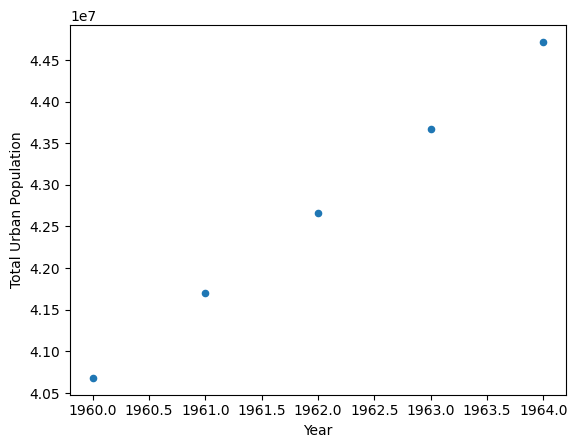

In [74]:
import matplotlib.pyplot as plt
df_pop_ceb.plot(kind='scatter', x= 'Year', y= 'Total Urban Population')
plt.show()

C:\Users\rayhw\AppData\Local\Temp\ipykernel_22580\1855582966.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\rayhw\AppData\Local\Temp\ipykernel_22580\1855582966.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\rayhw\AppData\Local\Temp\ipykernel_22580\1855582966.py:13: SettingWithCopyWarning: 
A value is 

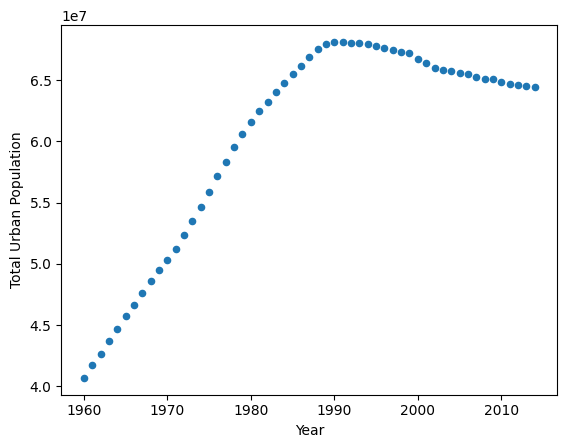

In [84]:
# Writing an iterator to load data in chunks (4)
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)

data = pd.DataFrame()

for df_urb_pop in urb_pop_reader:
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])
    pops_list = list(pops)

    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    data = pd.concat([data, df_pop_ceb])

data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()



In [85]:
# Writing an iterator to load data in chunks (5)
def plot_pop(filename, country_code):
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    data = pd.DataFrame()
    
    for df_urb_pop in urb_pop_reader:
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])
        pops_list = list(pops)

        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        data = pd.concat([data, df_pop_ceb])

    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()


C:\Users\rayhw\AppData\Local\Temp\ipykernel_22580\4160072811.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\rayhw\AppData\Local\Temp\ipykernel_22580\4160072811.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\rayhw\AppData\Local\Temp\ipykernel_22580\4160072811.py:14: SettingWithCopyWarning: 
A value is 

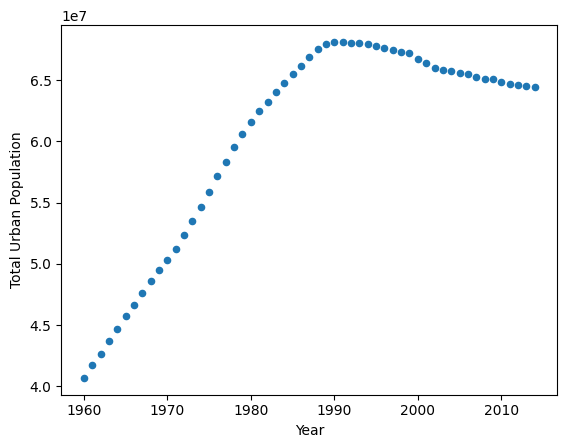

In [86]:
fn = 'ind_pop_data.csv'
plot_pop(fn, 'CEB')

C:\Users\rayhw\AppData\Local\Temp\ipykernel_22580\4160072811.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\rayhw\AppData\Local\Temp\ipykernel_22580\4160072811.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\rayhw\AppData\Local\Temp\ipykernel_22580\4160072811.py:14: SettingWithCopyWarning: 
A value is 

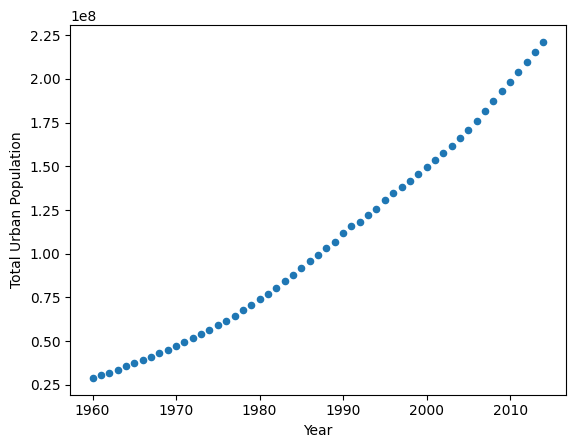

In [87]:
plot_pop(fn, 'ARB')